In [1]:
# Custom functions
from my_functions import *
import pickle 

### Import data

In [2]:
# Box Office Mojo list
df_wiki = pd.read_csv('bk_wiki.csv', dtype = object)

# Remove any duplicates
df_wiki = df_wiki.drop_duplicates(['Title', 'Year'])

df_wiki.head(2)

,Title,Year,Worldwide Gross
0,The Hunger Games: Catching Fire,2013,"$865,011,746"
1,The Hunger Games: Mockingjay – Part 1,2014,"$755,356,711"


In [3]:
# Columns 
Cols = ['review','wiki_name','wiki_year','rt_name',
        'genre','release_year','stream_year','critical_consensus','description']

# Rotten Tomatoes
df_rt = pd.concat([pd.read_csv('Rotten Tomatoes/bk_rt_1_raw.csv', dtype = object)
                   , pd.read_csv('Rotten Tomatoes/bk_rt_2_raw.csv', dtype = object)
                   , pd.read_csv('Rotten Tomatoes/bk_rt_3_raw.csv', dtype = object)
                   , pd.read_csv('Rotten Tomatoes/bk_rt_4_raw.csv', dtype = object)
                   , pd.read_csv('Rotten Tomatoes/bk_rt_5_raw.csv', dtype = object)
                   , pd.read_csv(r'C:\Users\james\OneDrive\Master of Data Science\Data Science Master Class 1\Assessments\A3 - WebCrawler\Rotten Tomatoes\bk_rt_outstanding_raw.csv', dtype = object)
                  ])
df_rt.columns = Cols

# Remove any duplicates
df_rt = df_rt.drop_duplicates()

print(f'{len(df_rt)} rows of data loaded for {len(df_rt.wiki_name.unique())} films')
print(f'Therefore, {len(df_wiki) - len(df_rt.wiki_name.unique())} films were not found by the WebCrawler')
df_rt.head(2)

6266 rows of data loaded for 367 films
Therefore, 98 films were not found by the WebCrawler


,review,wiki_name,wiki_year,rt_name,genre,release_year,stream_year,critical_consensus,description
0,"The serious dramatic themes ring hollow, howev...",It,2017,It - Movie Reviews,"Mystery & Thriller , Horror",2017,2017,Well-acted and fiendishly frightening with an ...,"Seven young outcasts in Derry, Maine, are abou..."
1,The film depends - and succeeds - entirely on ...,It,2017,It - Movie Reviews,"Mystery & Thriller , Horror",2017,2017,Well-acted and fiendishly frightening with an ...,"Seven young outcasts in Derry, Maine, are abou..."


In [4]:
# Remove Rotten Tomato records without reviews
df_rt_clean = df_rt.loc[~((df_rt['review'] == 'no reviews found')
                          |
                          (df_rt['review'] == 'misc error')
                          |
                          (df_rt['review'] == '')
                         )
                        ,:].dropna()
print(f'{len(df_rt) - len(df_rt_clean)} rows of removed')

95 rows of removed


In [5]:
# Film has no release year and stream year doesn't align to year from the Box Office Mojo data.
df_rt_clean[df_rt_clean.wiki_name == 'The Avengers'].head()

,review,wiki_name,wiki_year,rt_name,genre,release_year,stream_year,critical_consensus,description
862,Very terrible.,The Avengers,2012,The Avengers - Movie Reviews,Adventure,In Theaters:,2008,"A TV spinoff that lacks enough energy to spin,...",A charismatic evil genius named Sir August de ...
863,The movie lets [Fiennes and Thurman] down with...,The Avengers,2012,The Avengers - Movie Reviews,Adventure,In Theaters:,2008,"A TV spinoff that lacks enough energy to spin,...",A charismatic evil genius named Sir August de ...
864,"The new Avengers is dismal in dispiriting, dre...",The Avengers,2012,The Avengers - Movie Reviews,Adventure,In Theaters:,2008,"A TV spinoff that lacks enough energy to spin,...",A charismatic evil genius named Sir August de ...
865,Some bad movies are bold outrages; many others...,The Avengers,2012,The Avengers - Movie Reviews,Adventure,In Theaters:,2008,"A TV spinoff that lacks enough energy to spin,...",A charismatic evil genius named Sir August de ...
866,"This Avengers film is so horrendously, painful...",The Avengers,2012,The Avengers - Movie Reviews,Adventure,In Theaters:,2008,"A TV spinoff that lacks enough energy to spin,...",A charismatic evil genius named Sir August de ...


In [6]:
# Group records into a single line per film (reviews become a list of reviews)
df_rt_clean = rev_group_list(df_rt_clean, 'review', 'wiki_name')

# Remove records where release year != mojo_year
df_rt_clean = df_rt_clean[df_rt_clean['wiki_year'] == df_rt_clean['release_year']]

# Number of reviews remaining
n = 0
for i in df_rt_clean['review']:
    for j in i: 
        n+=1

print(f'{len(df_rt_clean)} of films remaining with a total of {n} reviews')

df_rt_clean.head()

251 of films remaining with a total of 4768 reviews


,review,wiki_name,wiki_year,rt_name,genre,release_year,stream_year,critical_consensus,description
292,[ ‘Here are beauties that pierce like swords o...,The Lord of the Rings: The Fellowship of the Ring,2001,The Lord of the Rings: The Fellowship of the R...,"Fantasy , Adventure",2001,2011,"Full of eye-popping special effects, and featu...",The future of civilization rests in the fate o...
953,"[""...for me to consider Captain America: Civil...",Captain America: Civil War,2016,Captain America: Civil War - Movie Reviews,"Action , Fantasy , Adventure",2016,2016,Captain America: Civil War begins the next wav...,Political pressure mounts to install a system ...
255,"[""After all these years, I just sort of go wit...",Harry Potter and the Half-Blood Prince,2009,Harry Potter and the Half-Blood Prince - Movie...,"Fantasy , Kids & Family , Adventure",2009,2011,"Dark, thrilling, and occasionally quite funny,...",As Death Eaters wreak havoc in both Muggle and...
592,"[""All I want is your protection,"" he says to B...",The Twilight Saga: Eclipse,2010,The Twilight Saga: Eclipse - Movie Reviews,"Romance , Fantasy",2010,2014,Stuffed with characters and overly reliant on ...,Danger once again surrounds Bella (Kristen Ste...
763,"[""Annabelle Comes Home"" is so low stakes it's ...",Annabelle Comes Home,2019,Annabelle Comes Home - Movie Reviews,"Mystery & Thriller , Horror",2019,2019,Fun for fans even if it isn't as frightening a...,Determined to keep Annabelle from wreaking mor...


### Merge DataFrames

In [7]:
# Merge Rotten Tomatoes data
df_merge = df_wiki.merge(df_rt_clean
                         , how='left'
                         , left_on = ['Title', 'Year']
                         , right_on = ['wiki_name', 'wiki_year'])

# Filter to columns that we will need
df_merge = df_merge.loc[:,['Title'
                          , 'Year'
                          , 'genre'
                          , 'description'
                          , 'critical_consensus'
                          , 'review']]

# Rename columns
df_merge.columns = ['title'
                  , 'year'
                  , 'genre'
                  , 'movie_description'
                  , 'critical_consensus'
                  , 'review']

# Remove any empty rows remaining
df_merge = df_merge.dropna()

print('Number of films merged: ', len(df_merge))

Number of films merged:  251


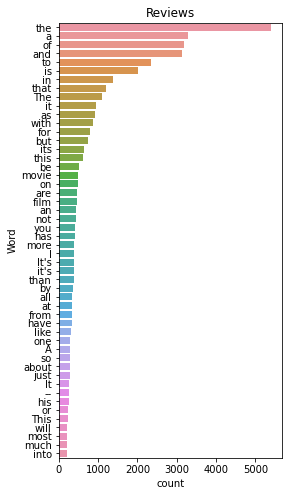

In [8]:
freq_words_chart(df_merge['review'].apply(lambda x: '| '.join(x)), 50, 'Reviews', 4)

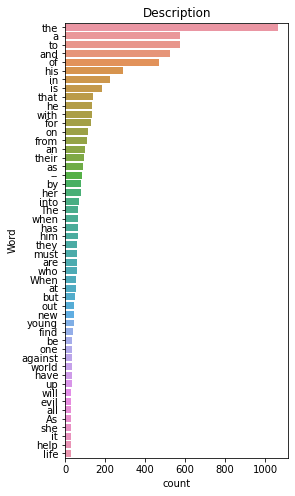

In [9]:
freq_words_chart(df_merge['movie_description'], 50, 'Description', 4)

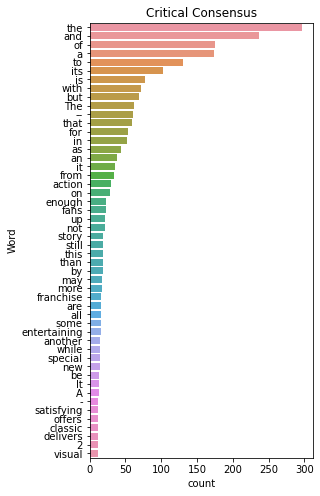

In [10]:
freq_words_chart(df_merge['critical_consensus'], 50, 'Critical Consensus', 4)

Text(0.5, 1.0, 'Description word count distribution')

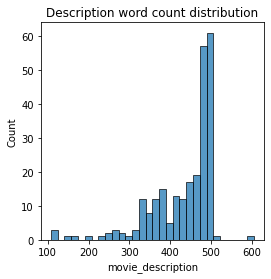

In [11]:
des_len = df_merge['movie_description'].apply(lambda x: len(x))
plt.figure(figsize=(4,4))
sns.histplot(des_len, bins = 30, )
plt.title('Description word count distribution')

Text(0.5, 1.0, 'Review word count distribution')

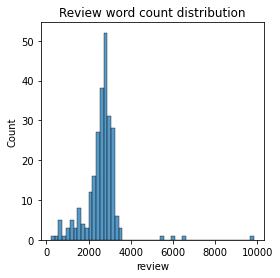

In [12]:
rev_len = df_merge['review'].apply(lambda x: len(', '.join(x)))
plt.figure(figsize=(4,4))
sns.histplot(rev_len)
plt.title('Review word count distribution')

Text(0.5, 1.0, 'Critical Consensus word count distribution')

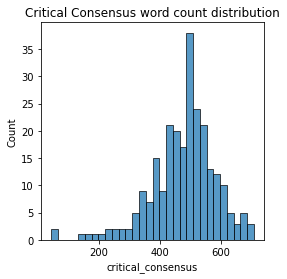

In [13]:
rev_len = df_merge['critical_consensus'].apply(lambda x: len(', '.join(x)))
plt.figure(figsize=(4,4))
sns.histplot(rev_len, bins = 30)
plt.title('Critical Consensus word count distribution')

Reducing the Genres

In [14]:
df_merge["genre"] = df_merge["genre"].apply(lambda x: x.split(' , '))

# Plot genres
a = df_merge["genre"]
b = []
for i in a:
    for j in i:
        b.append(j)

#freq_words_chart(b, 50, 'Description')
b_df = pd.DataFrame(b, columns=['Genres'])
b_df = (b_df.value_counts() / len(b_df) * 100).reset_index()
b_df.columns = ['Genres', 'Percentage']
b_df.style.bar()

,Genres,Percentage
0,Adventure,20.244565
1,Action,15.217391
2,Fantasy,13.722826
3,Comedy,10.597826
4,Sci-Fi,8.423913
5,Kids & Family,7.880435
6,Animation,5.163043
7,Mystery & Thriller,5.163043
8,Drama,4.755435
9,Horror,3.396739


In [15]:
dict_genres = { 'Adventure': 'Adventure',
                'Action': 'Action',
                'Fantasy': 'Fantasy',
                'Comedy': 'Comedy',
                'Sci-Fi': 'Sci-Fi',
                'Kids & Family': 'Kids, Family & Animation',
                'Animation': 'Kids, Family & Animation',
                'Mystery & Thriller': 'Mystery, Thriller & Horror',
                'Drama': 'Drama & Romance',
                'Horror': 'Mystery, Thriller & Horror',
                'Romance': 'Drama & Romance',
                'Musical': 'Drama & Romance',
                'Biography': '',
                'History': '',
                'Crime': 'Mystery, Thriller & Horror',
                'Sports & Fitness': '',
                'Other': '',
                'Anime': 'Kids, Family & Animation',
                'LGBTQ+': 'Drama & Romance',
                'Music': 'Drama & Romance'}

df_merge["genre"] = df_merge["genre"].apply(lambda x: [*map(dict_genres.get, x)])
df_merge["genre"] = df_merge["genre"].apply(lambda x: [a for a in x if a])


In [16]:
set(b)

{'Action',
 'Adventure',
 'Animation',
 'Anime',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Fantasy',
 'History',
 'Horror',
 'Kids & Family',
 'LGBTQ+',
 'Music',
 'Musical',
 'Mystery & Thriller',
 'Other',
 'Romance',
 'Sci-Fi',
 'Sports & Fitness'}

In [17]:
# Plot genres with updates
a = df_merge["genre"]
b = []
for i in a:
    for j in i:
        b.append(j)

#freq_words_chart(b, 50, 'Description')
b_df = pd.DataFrame(b, columns=['Genres'])
b_df = (b_df.value_counts() / len(b_df) * 100).reset_index()
b_df.columns = ['Genres', 'Percentage']
b_df.style.bar()

,Genres,Percentage
0,Adventure,20.694444
1,Action,15.555556
2,Fantasy,14.027778
3,"Kids, Family & Animation",13.611111
4,Comedy,10.833333
5,"Mystery, Thriller & Horror",9.166667
6,Sci-Fi,8.611111
7,Drama & Romance,7.500000


In [18]:
# Save dataframe to CSV
df_merge.to_csv('bk_data_merged.csv', index = False)
df_merge.dtypes

# Create a Pickle backup to preserve data structure
outfile = open('bk_data_merged','wb')
pickle.dump(df_merge, outfile)
outfile.close()